In [1]:
# Import necessary modules and functions

import pandas as pd # get information from files
import seaborn as sns # statistically summarizing information (for plots?)
import numpy as np # for large, multi-dimensional arrays and mathematical functions
import random 

import matplotlib.pyplot as plt # a plotting library; (pyplot from python)
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats # scipy is a library for scientific computing; it imports statistical computation

# sklearn is a machine learning library:
from sklearn.preprocessing import StandardScaler # StandardScaler calculates z values
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

The kickstarter website is basically a platform where people can scroll and find businesses
that need some support to start. As a simple user, you can choose to donate money: 1 USD or more;
I believe most people donate 1 USD. If business reaches its goal until the pre-set deadline,
it will be funded. If not, no user will loose his/her dollar.

Each project has the following attributes that describe it (the ones with a star are also in the test set)
(the ! symbol is the final training set):

!*project_id = unique identifier of project
backers_count = how many people + institutions financially support the project
*blurb = short description of project
!*category = theme of project; can be art, music, publishing, crafts, ...
!*subcategory = subfield of category
*country = country where business shall take place
*name = name of business
!*staff_pick = TRUE if someone from the Kickstarter.com staff likes your project (doesn't rlly help with anything)
!*location = city in which the business is located
!funded = TRUE or FALSE 
*project_url = website of business
*reward_url = website where you can donate money for this business

pledged = how many people donated
usd_pledged = how much usd was donated (usually the same as pledged, bcz most people donate 1 usd)
converted_pledged_amount = how much money was donated (sum is here converted)
!*goal = the minimal sum they have to reach in order to be funded
!*currency = the currency in which the money are represented
!*fx_rate = currency exchange rate

*created_at = time when project is put on website
!*deadline = maximum time when project should be launched
!*launched_at = when Kickstarters.com aprove it and it's the first day you cand start receiving money

Basic problems
* The data has categorical values instead of numeric (one hot encoding could be a solution)
* outliers

Linear regression necessities/:
* explanatory variables (every feature needs to be independent)

Multiple regression necessities:
* 

In [3]:
KS_trainSet = pd.read_csv('KS_train_data.csv', delimiter = ',') # gets training dataset
KS_testSet = pd.read_csv('KS_test_data.csv', delimiter = ',') # gets training dataset

training_data = pd.read_csv('training_data.csv', delimiter = ',') # gets training dataset

In [9]:
################################################## CLEANING DATA ##############################################################

# Create another dataset with neccesary attributes:

# df = KS_trainSet[['project_id', 'category', 'subcategory', 'staff_pick', 'country', 'goal', 'currency', 'fx_rate', 'launched_at', 'deadline', 'funded']]
# export_csv = df.to_csv (r'C:\ComputerScience\Year3\Period1\IntroDataScience\IntroDataScienceKickstarter\training_data.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

# There are quite a few instances that have an unknown country
# All of them use USD as currency. Therefore, we assume all these projects
# are from the US:

country_attribute = []
for i in range(len(training_data)):
    if(training_data.iloc[i].country != '?'):
        country_attribute.append(training_data.iloc[i].country)
    else:
        country_attribute.append('US')
        
training_data['final_country_attribute'] = country_attribute
KS_trainSet['final_country_attribute'] = country_attribute

In [13]:
training_data.head(10)

,project_id,category,subcategory,staff_pick,country,goal,currency,fx_rate,launched_at,deadline,funded,final_country_attribute
0,KS_000000,art,mixed media,False,US,2800.0,USD,1.0,1332969260,1334866560,True,US
1,KS_000001,art,public art,False,US,4500.0,USD,1.0,1332984145,1336440145,True,US
2,KS_000002,art,sculpture,False,US,5000.0,USD,1.0,1332991739,1338175739,True,US
3,KS_000003,art,art,False,GB,6500.0,USD,1.0,1332991696,1334806096,True,GB
4,KS_000004,art,public art,False,US,15000.0,USD,1.0,1332992240,1335584240,True,US
5,KS_000005,art,painting,False,US,600.0,USD,1.0,1333017856,1336090320,True,US
6,KS_000006,art,art,False,US,2000.0,USD,1.0,1333045464,1334030340,True,US
7,KS_000007,art,painting,True,US,10000.0,USD,1.0,1332822807,1335671940,True,US
8,KS_000008,art,painting,True,US,2800.0,USD,1.0,1332848610,1336736610,True,US
9,KS_000009,art,public art,False,US,5000.0,USD,1.0,1332851088,1335443088,True,US


In [7]:
training_data.columns

Index(['project_id', 'category', 'subcategory', 'staff_pick', 'country',
       'goal', 'currency', 'fx_rate', 'launched_at', 'deadline', 'funded',
       'final_country_attribute'],
      dtype='object')

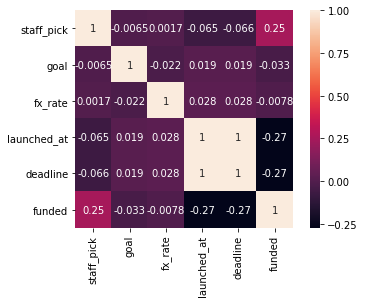

In [12]:
# c'est bullcito

cols = training_data.columns
corrmat = training_data[cols].corr()
sns.heatmap(corrmat, square=True, annot=True)

In [15]:
# Chapter 5 Correlation
def mean(x):
    return sum(x) / len(x)

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i
            for v_i, w_i in zip(v, w))

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(x):
    return math.sqrt(variance(x))

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

In [ ]:
# Chapter 14 Linear Regression
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

def error(alpha, beta, x_i, y_i):
    """the error from predicting beta * x_i + alpha
    when the actual value is y_i"""
    return y_i - predict(alpha, beta, x_i)

def least_squares_fit(x, y):
    """given training values for x and y,
    find the least-squares values of alpha and beta"""
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2
            for x_i, y_i in zip(x, y))

def total_sum_of_squares(y):
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha, beta, x, y):
    """the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model"""
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) /
            total_sum_of_squares(y))

def squared_error(x_i, y_i, theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2

def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, x_i, y_i), # alpha partial derivative
            -2 * error(alpha, beta, x_i, y_i) * x_i] # beta partial derivative

In [ ]:
# Chapter 15 Multiple Linear Regression
def predict(x_i, beta):
    """assumes that the first element of each x_i is 1"""
    return dot(x_i, beta)

def error(x_i, y_i, beta):
    return y_i - predict(x_i, beta)

def squared_error(x_i, y_i, beta):
    return error(x_i, y_i, beta) ** 2

def squared_error_gradient(x_i, y_i, beta):
    """the gradient (with respect to beta)
    corresponding to the ith squared error term"""
    return [-2 * x_ij * error(x_i, y_i, beta)
            for x_ij in x_i]

def estimate_beta(x, y):
    beta_initial = [random.random() for x_i in x[0]]
    return minimize_stochastic(squared_error,
            squared_error_gradient,
            x, y,
            beta_initial,
            0.001)

def multiple_r_squared(x, y, beta):
    sum_of_squared_errors = sum(error(x_i, y_i, beta) ** 2
            for x_i, y_i in zip(x, y))
    return 1.0 - sum_of_squared_errors / total_sum_of_squares(y)

def bootstrap_sample(data):
    """randomly samples len(data) elements with replacement"""
    return [random.choice(data) for _ in data]


def bootstrap_statistic(data, stats_fn, num_samples):
    """evaluates stats_fn on num_samples bootstrap samples from data"""
    return [stats_fn(bootstrap_sample(data))
            for _ in range(num_samples)]

def estimate_sample_beta(sample):
    """sample is a list of pairs (x_i, y_i)"""
    x_sample, y_sample = zip(*sample) # magic unzipping trick
    return estimate_beta(x_sample, y_sample)

def p_value(beta_hat_j, sigma_hat_j):
    if beta_hat_j > 0:
    # if the coefficient is positive, we need to compute twice the
    # probability of seeing an even *larger* value
        return 2 * (1 - normal_cdf(beta_hat_j / sigma_hat_j))
    else:
        # otherwise twice the probability of seeing a *smaller* value
        return 2 * normal_cdf(beta_hat_j / sigma_hat_j)
    
# alpha is a *hyperparameter* controlling how harsh the penalty is
# sometimes it's called "lambda" but that already means something in Python
def ridge_penalty(beta, alpha):
    return alpha * dot(beta[1:], beta[1:])

def squared_error_ridge(x_i, y_i, beta, alpha):
    """estimate error plus ridge penalty on beta"""
    return error(x_i, y_i, beta) ** 2 + ridge_penalty(beta, alpha)

def ridge_penalty_gradient(beta, alpha):
    """gradient of just the ridge penalty"""
    return [0] + [2 * alpha * beta_j for beta_j in beta[1:]]

def squared_error_ridge_gradient(x_i, y_i, beta, alpha):
    """the gradient corresponding to the ith squared error term
    including the ridge penalty"""
    return vector_add(squared_error_gradient(x_i, y_i, beta),
            ridge_penalty_gradient(beta, alpha))

def estimate_beta_ridge(x, y, alpha):
    """use gradient descent to fit a ridge regression
    with penalty alpha"""
    beta_initial = [random.random() for x_i in x[0]]
        return minimize_stochastic(partial(squared_error_ridge, alpha=alpha),
                partial(squared_error_ridge_gradient,
                alpha=alpha),
                x, y,
                beta_initial,
                0.001)

def lasso_penalty(beta, alpha):
    return alpha * sum(abs(beta_i) for beta_i in beta[1:])

In [ ]:
# Actual computations
alpha, beta = least_squares_fit(var1, var2)